# Loading & Viewing Data

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/cost_of_living_us.csv')
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [11]:
df.keys()

Index(['case_id', 'state', 'isMetro', 'areaname', 'county',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'childcare_cost', 'taxes', 'total_cost', 'median_family_income'],
      dtype='object')

In [12]:
df.shape

(31430, 15)

Have plenty of observations, will drop any NA values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

Family member count should be numeric (an int or float), will fix this

# Cleaning the Data

In [14]:
# identify and remove missing values
missing_values = df.isna().sum()

print("Missing values in each column:\n", missing_values)

# Remove missing values, no difference in info
df = df.dropna()

Missing values in each column:
 case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


make sure missing values were dropped

In [15]:
missing_values = df.isna().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64


Restructure the family member count variable to numeric

In [16]:
df[['number_of_parents', 'number_of_children']] = df['family_member_count'].str.split('p', expand=True)

df['number_of_children'] = df['number_of_children'].str.strip('c')

df = df.astype({'number_of_parents' : np.int64, 'number_of_children': np.int64})

#New family_size variable
df['family_size'] = df['number_of_parents'] + df['number_of_children']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
df['isMetro'] = np.where(df['isMetro'] == True, 1, 0)


In [18]:
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,number_of_parents,number_of_children,family_size
0,1,AL,1,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,1,AL,1,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,2
2,1,AL,1,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,3
3,1,AL,1,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,4
4,1,AL,1,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31420 entries, 0 to 31429
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   isMetro                 31420 non-null  int64  
 3   areaname                31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null

# Simple Summary Statistics

In [20]:
df.describe()

,case_id,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,number_of_parents,number_of_children,family_size
count,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000,31420.000000
mean,1589.329726,0.372056,11073.359622,8287.654372,13593.989839,13393.008581,7015.258917,9879.247416,7657.101541,70899.620274,68315.997017,1.500000,2.000000,3.500000
std,917.363818,0.483361,4166.013774,3271.226843,1640.569523,5204.016778,2397.562090,6778.325756,3339.914200,21846.343200,16886.970245,0.500008,1.414236,1.500024
min,1.000000,0.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562,1.000000,0.000000,1.000000
25%,792.000000,0.000000,8580.000000,5801.424360,12535.204200,9667.440000,5286.337290,5341.208880,5597.540100,53773.911300,57223.988281,1.000000,1.000000,2.000000
50%,1593.500000,0.000000,10416.000000,8129.156280,13698.315000,13082.514000,6733.056120,10166.340120,6897.747780,70974.249000,65955.605469,1.500000,2.000000,3.500000
75%,2386.000000,1.000000,12444.000000,10703.624280,14765.867400,16657.816800,8412.597480,14272.137600,8789.137950,85368.045300,76136.070312,2.000000,3.000000,5.000000
max,3171.000000,1.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750,2.000000,4.000000,6.000000


Simple Linear Regression, checking which variables have a statistical significant relationship with total cost

In [21]:
import statsmodels.api as sm

In [22]:
explanatory_vars = ['family_size', 'housing_cost', 'food_cost', 'transportation_cost',
                    'healthcare_cost', 'childcare_cost', 'taxes', 'median_family_income']
X = df[explanatory_vars]
Y = df['total_cost']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.647e+17
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:16:56   Log-Likelihood:             1.5055e+05
No. Observations:               31420   AIC:                        -3.011e+05
Df Residuals:                   31411   BIC:                        -3.010e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0004 

R-squared of 1 indicates utilizing all these variables may lead to overfitting... appears as though every variable other than median family income has a statistically significant relationship with total_costs... this is obvious for the other cost variables

In [23]:
numerical_cols = ['family_size', 'housing_cost', 'food_cost', 'transportation_cost',
                  'healthcare_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']


# Visualizations

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

heatmap

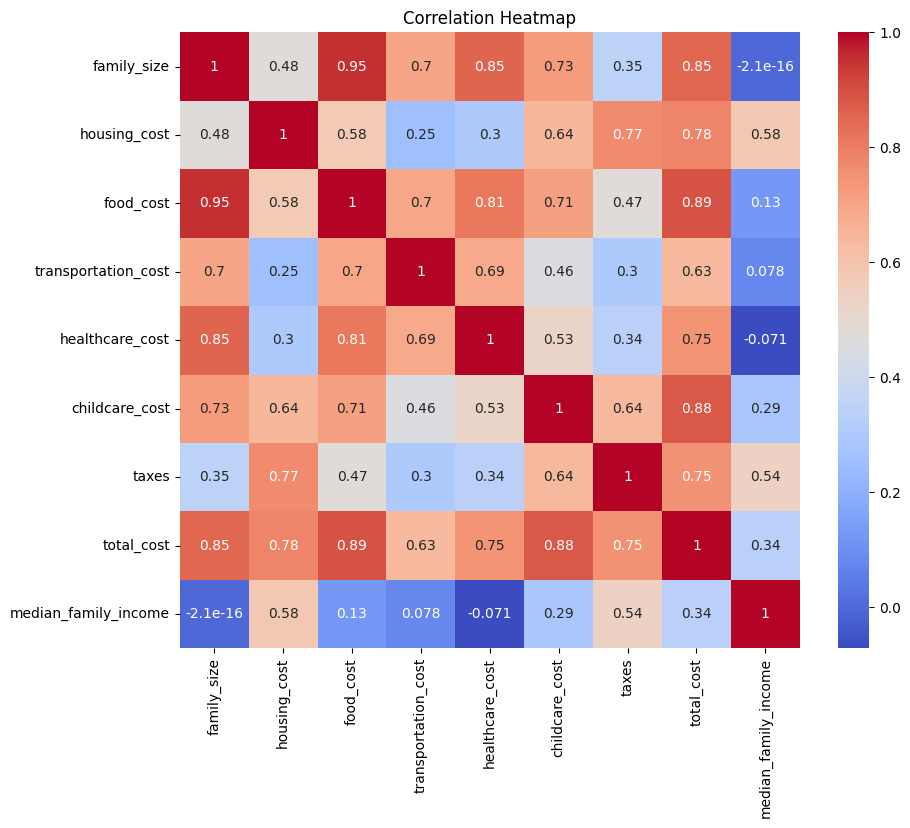

In [25]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

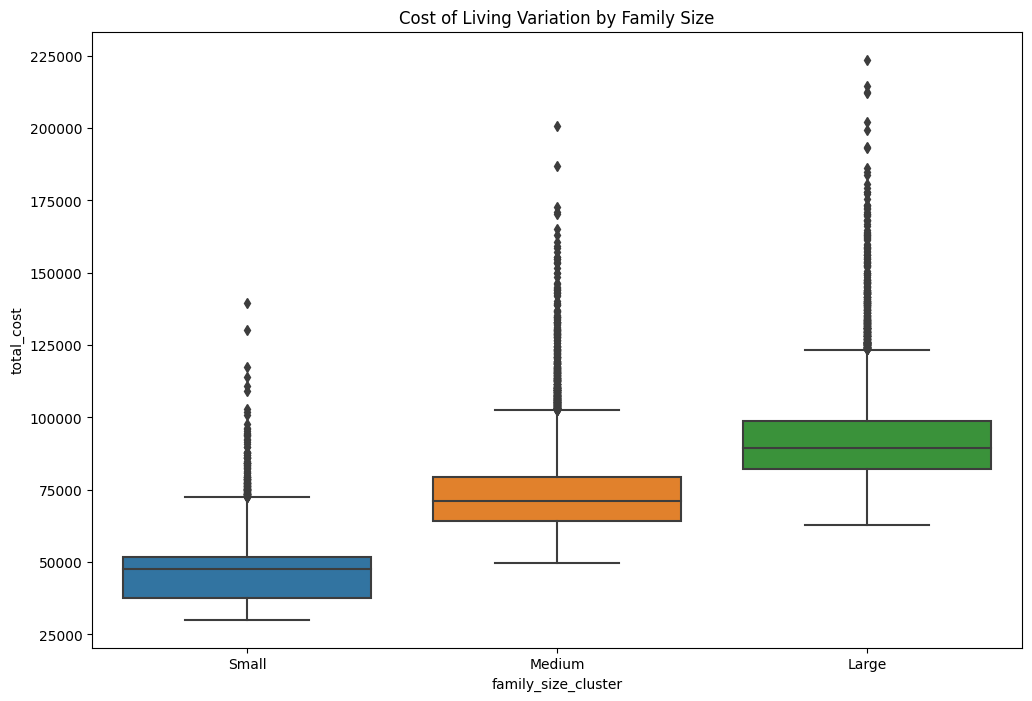

In [39]:
df['family_size_cluster'] = pd.cut(df['family_size'], bins=[0, 2, 4, 6], labels=['Small', 'Medium', 'Large'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='family_size_cluster', y='total_cost', data=df)
plt.title('Cost of Living Variation by Family Size')
plt.show()

This is in alignment with what we would expect

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


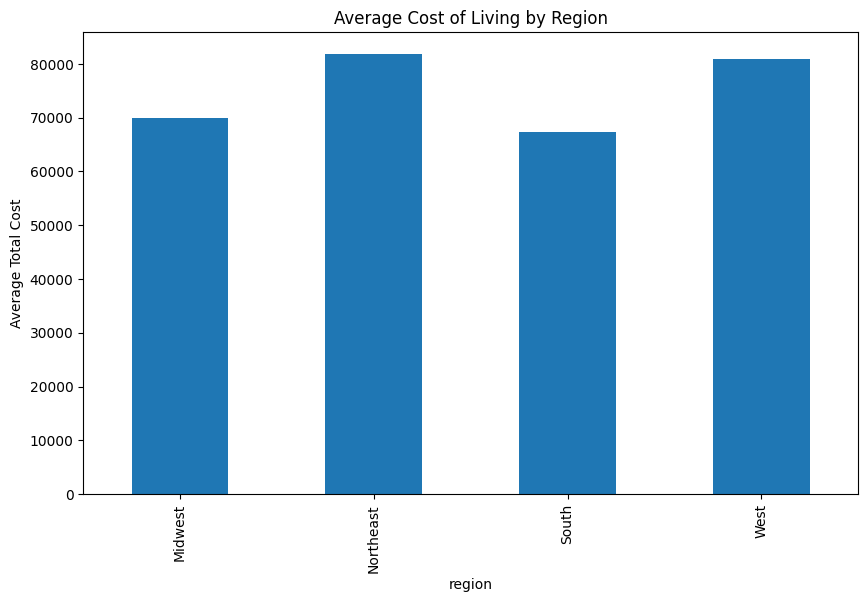

In [27]:
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'Northeast', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'Northeast',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'Midwest', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
    'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}

# Assign each row to a region
df['region'] = df['state'].map(state_to_region)

# Calculate the average cost of living by region
avg_costs_by_region = df.groupby('region').mean()

# Visualize the average cost of living by region
avg_costs_by_region['total_cost'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Cost of Living by Region')
plt.ylabel('Average Total Cost')
plt.show()

With more detail

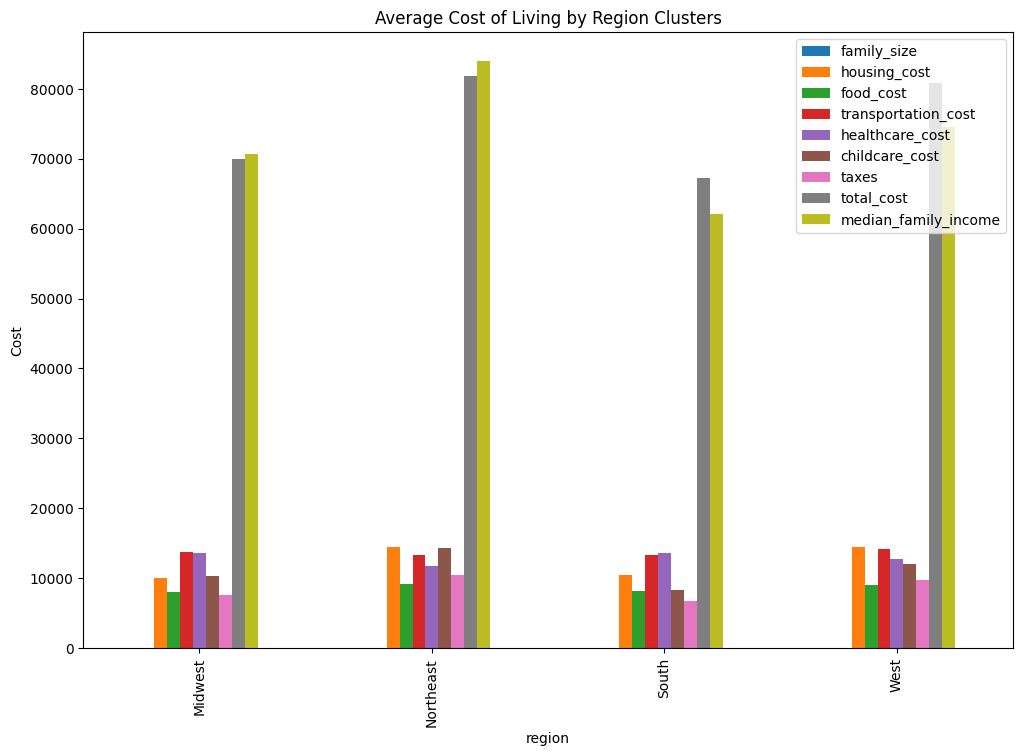

In [28]:
avg_costs = df.groupby('region')[numerical_cols].mean()
avg_costs.plot(kind='bar', figsize=(12, 8))
plt.title('Average Cost of Living by Region Clusters')
plt.ylabel('Cost')
plt.show()

# Create Variables

In [29]:
region_dummies = pd.get_dummies(df['region'], prefix='region')
df = pd.concat([df, region_dummies], axis=1)

In [42]:
df['houseCost_to_income_ratio'] = df['housing_cost'] / df['median_family_income']

In [43]:
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,number_of_children,family_size,family_size_cluster,region,region_Midwest,region_Northeast,region_South,region_West,cost_to_income_ratio,houseCost_to_income_ratio
0,1,AL,1,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,0,1,Small,South,0,0,1,0,0.537650,0.116500
1,1,AL,1,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,1,2,Small,South,0,0,1,0,0.783372,0.165285
2,1,AL,1,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,2,3,Medium,South,0,0,1,0,1.042879,0.165285
3,1,AL,1,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,3,4,Medium,South,0,0,1,0,1.290275,0.208972
4,1,AL,1,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,4,5,Large,South,0,0,1,0,1.380947,0.208972


# Model Creation/Variable Selection

2- create a model using the family size, region, and other cost measures to predict the cost of living for a particular family... have to change region back to numerical

In [32]:
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()

from xgboost import XGBRegressor
xgb = XGBRegressor()

algos = [rforest, xgb]

# select evaluation metrics accuracy, balanced accuracy, confusion matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [33]:
X = df[['family_size', 'isMetro', 'region_Midwest', 'region_South',
        'region_Northeast', 'region_West', 'housing_cost', 'food_cost',
        'transportation_cost', 'healthcare_cost', 'childcare_cost', 'taxes']]
y = df['total_cost']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
for algo in algos:
  algo.fit(X_train, y_train)
  y_test_pred = algo.predict(X_test)
  print(type(algo).__name__)
  print()
  print('MAE: ', mean_absolute_error(y_test,y_test_pred))
  print()
  print('MSE', mean_squared_error(y_test, y_test_pred))
  print()
  print('R_squared', r2_score(y_test, y_test_pred))

RandomForestRegressor

MAE:  652.6301978001275

MSE 1311672.852677671

R_squared 0.997236329987052
XGBRegressor

MAE:  682.5798030726183

MSE 1284554.4900783629

R_squared 0.9972934678666406


# Next, can use SHAP to identify variable importance... and can leave out those deemed not informative

In [36]:
!pip install shap

In [37]:
import shap

In [38]:
explainer = shap.Explainer(rforest.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 9427it [2:25:25,  1.08it/s]


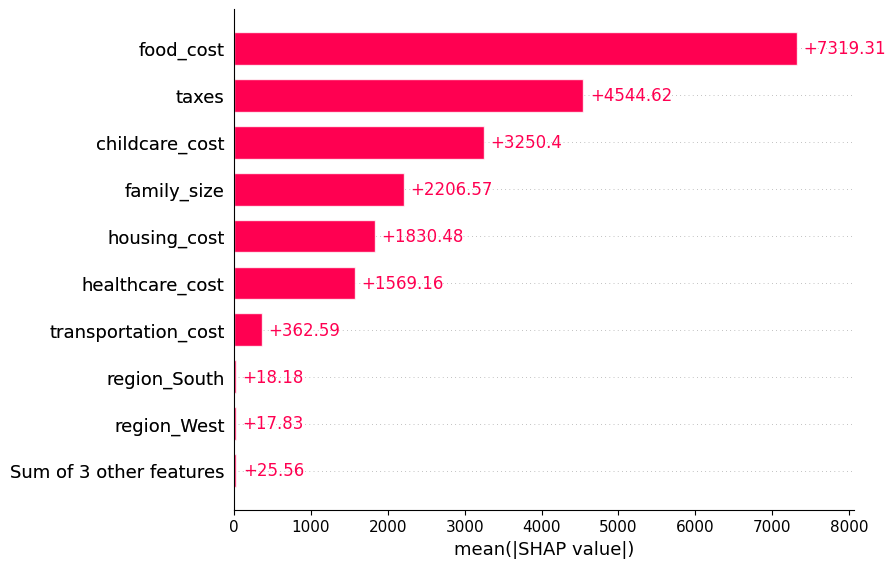

In [40]:
shap.plots.bar(shap_values)

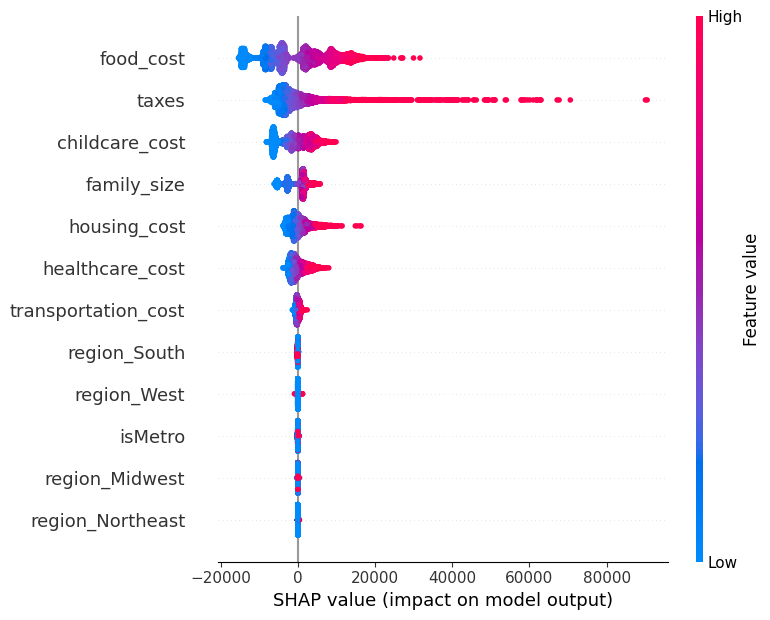

In [41]:
shap.summary_plot(shap_values, X_test)

# Run Model Again with only most impactful variables

In [45]:
X = df[['family_size', 'houseCost_to_income_ratio', 'taxes']]
y = df['total_cost']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
for algo in algos:
  algo.fit(X_train, y_train)
  y_test_pred = algo.predict(X_test)
  print(type(algo).__name__)
  print()
  print('MAE: ', mean_absolute_error(y_test,y_test_pred))
  print()
  print('MSE', mean_squared_error(y_test, y_test_pred))
  print()
  print('R_squared', r2_score(y_test, y_test_pred))

RandomForestRegressor

MAE:  2871.0136035467863

MSE 15532185.056609195

R_squared 0.9672739784246656
XGBRegressor

MAE:  2739.7049254286676

MSE 14621897.165171377

R_squared 0.9691919378789462


# leaving out the less impactful variables actually increased our measures of error... so should include all variables